In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_2016 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_2016

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= date_2016).\
                        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date',ascending=True)
precipitation_df



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


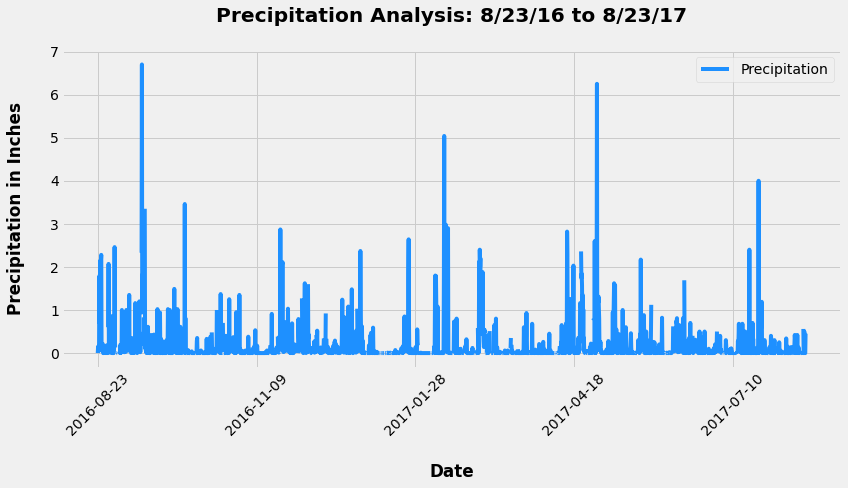

In [87]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize = (12,7), color='dodgerblue')
plt.xlabel("\nDate", weight="bold")
plt.ylabel("Precipitation in Inches\n", weight="bold")
plt.title("Precipitation Analysis: 8/23/16 to 8/23/17\n", weight="bold") 
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Output_Data/Precipitation_Analysis.png")
plt.show()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(Station.station).distinct().count()
print(f"There are {total_number_stations} stations in the dataset.")

There are 9 stations in the dataset.


In [98]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                                     group_by(Measurement.station).\
                                    order_by(func.count(Measurement.station).desc()).all()
print("Most Active Stations:")
active_stations

Most Active Stations:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
print(f"The most active stations is {most_active_station}.")

The most active stations is USC00519281.


In [113]:
# Calculate the lowest, highest, and average temperature of the station ID above
most_active_temperatures = session.query(func.min(Measurement.tobs), 
                                        func.max(Measurement.tobs),
                                        func.avg(Measurement.tobs)).\
                                        filter(Measurement.station == most_active_station).all()

print("Temperature Measurements for Most Active Station - USC00519281")
print(f"Low: {most_active_temperatures[0][0]}, High: {most_active_temperatures[0][1]}, Average: {round(most_active_temperatures[0][2], 1)}")

Temperature Measurements for Most Active Station - USC00519281
Low: 54.0, High: 85.0, Average: 71.7


In [118]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_data = session.query(Measurement.date, Measurement.tobs).\
                            filter(Measurement.station == most_active_station).\
                            filter(Measurement.date >= date_2016).all()
most_active_station_data

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [122]:
#Save results into a dataframe 
USC00519281_df = pd.DataFrame(most_active_station_data, columns=['Date','Temperature'])
USC00519281_df

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


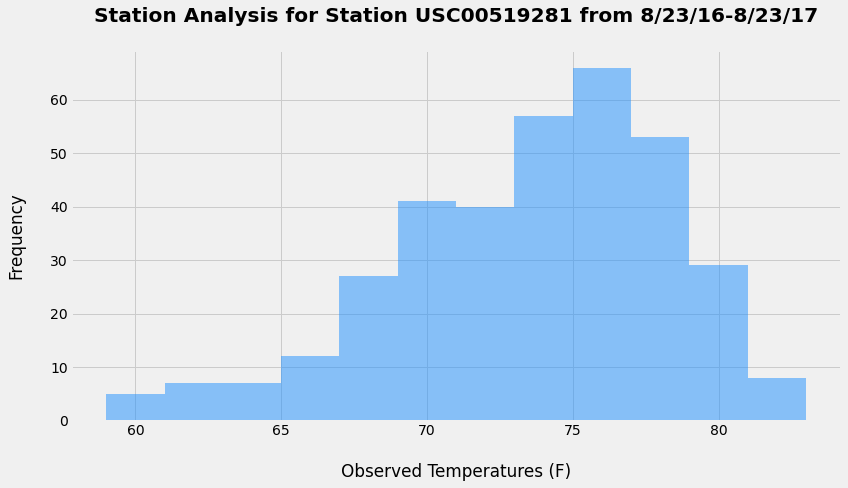

In [137]:
# Use the query of temperature observation data for this station and plot the results as a histogram
USC00519281_df.hist(figsize=(12,7), bins=12, color="dodgerblue", alpha=0.5)

plt.xlabel("\nObserved Temperatures (F)")
plt.ylabel("Frequency\n")
plt.title(f"Station Analysis for Station {most_active_station} from 8/23/16-8/23/17\n", weight="bold")

plt.grid(True)
plt.tight_layout()
plt.savefig("Output_Data/Station_Analysis.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()